In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml("mnist_784") 

In [2]:
X, y = dataset["data"], dataset["target"] 

In [3]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [4]:
#y

array([['5', '0', '4', ..., '4', '5', '6']], dtype=object)

In [5]:
#Y_new[:,100] #10 boyutlu bir liste vardır buna da one hot denir

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [6]:
#y[0,100]   #burada gerçek değerler vardır

'5'

In [4]:
m = 60000  
m_test = X.shape[0] - m
#elemanları karıstırıp yer değiştiriyor
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

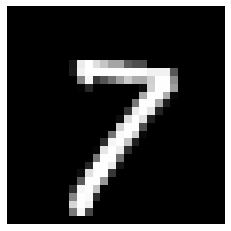

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [8]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [9]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [10]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [11]:
def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

In [12]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

<ipython-input-10-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


Epoch 0 cost:  6.683091538258906
Epoch 100 cost:  0.8660000698951418
Epoch 200 cost:  0.6600712565575465
Epoch 300 cost:  0.5804514857822227
Epoch 400 cost:  0.5387625024318689
Epoch 500 cost:  0.506702646718901
Epoch 600 cost:  0.4846440867197736
Epoch 700 cost:  0.4692380934696007
Epoch 800 cost:  0.45844022438880433
Epoch 900 cost:  0.44609578488707086
Epoch 1000 cost:  0.43712735897365607
Epoch 1100 cost:  0.43488104107605247
Epoch 1200 cost:  0.4260030685257049
Epoch 1300 cost:  0.4211847209035981
Epoch 1400 cost:  0.41582350393074885
Epoch 1500 cost:  0.412050716614122
Epoch 1600 cost:  0.40705900686898366
Epoch 1700 cost:  0.4068908727039263
Epoch 1800 cost:  0.39924774151423187
Epoch 1900 cost:  0.4003025512606176
Final cost: 0.39546636841192057


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

<ipython-input-10-b3dbf6f23306>:2: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


[[ 918    1   21    5    1   28   17    5   12   14]
 [   0 1090   18    5    7    2    1    6   10    3]
 [  11    5  846   28   12   16   11   31    8   11]
 [   4   15   25  854    3   48    1   17   41   11]
 [   3    2   16    3  855   14   24   15   19   58]
 [  17    5    4   51    7  688   29    4   54   18]
 [  15    3   30    4   20   24  865    2   24    2]
 [   2    1   21   10    9   12    1  892   11   54]
 [   8   13   43   35   13   54    9   10  774   18]
 [   2    0    8   15   55    6    0   46   21  820]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1022
           1       0.96      0.95      0.96      1142
           2       0.82      0.86      0.84       979
           3       0.85      0.84      0.84      1019
           4       0.87      0.85      0.86      1009
           5       0.77      0.78      0.78       877
           6       0.90      0.87      0.89       989
           7       0.87      0.88   